# Setup

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# Creating queries for AlphaFold

In [2]:
# load EEA1 sequence
TEMP_INPUT_FASTA = '../../EEA1/EEA1.fasta'

with open(TEMP_INPUT_FASTA, 'r') as inpt:
    raw_lines = inpt.readlines()

raw_header = raw_lines[0]
raw_sequence = ''.join(raw_lines[1:])

header = raw_header.split()[0]
sequence = raw_sequence.strip().replace('\n', '')

print(header)
print(sequence)

>EEA1_HS
MLRRILQRTPGRVGSQGSDLDSSATPINTVDVNNESSSEGFICPQCMKSLGSADELFKHYEAVHDAGNDSGHGGESNLALKRDDVTLLRQEVQDLQASLKEEKWYSEELKKELEKYQGLQQQEAKPDGLVTDSSAELQSLEQQLEEAQTENFNIKQMKDLFEQKAAQLATEIADIKSKYDEERSLREAAEQKVTRLTEELNKEATVIQDLKTELLQRPGIEDVAVLKKELVQVQTLMDNMTLERERESEKLKDECKKLQSQYASSEATISQLRSELAKGPQEVAVYVQELQKLKSSVNELTQKNQTLTENLLKKEQDYTKLEEKHNEESVSKKNIQATLHQKDLDCQQLQSRLSASETSLHRIHVELSEKGEATQKLKEELSEVETKYQHLKAEFKQLQQQREEKEQHGLQLQSEINQLHSKLLETERQLGEAHGRLKEQRQLSSEKLMDKEQQVADLQLKLSRLEEQLKEKVTNSTELQHQLDKTKQQHQEQQALQQSTTAKLREAQNDLEQVLRQIGDKDQKIQNLEALLQKSKENISLLEKEREDLYAKIQAGEGETAVLNQLQEKNHTLQEQVTQLTEKLKNQSESHKQAQENLHDQVQEQKAHLRAAQDRVLSLETSVNELNSQLNESKEKVSQLDIQIKAKTELLLSAEAAKTAQRADLQNHLDTAQNALQDKQQELNKITTQLDQVTAKLQDKQEHCSQLESHLKEYKEKYLSLEQKTEELEGQIKKLEADSLEVKASKEQALQDLQQQRQLNTDLELRATELSKQLEMEKEIVSSTRLDLQKKSEALESIKQKLTKQEEEKKILKQDFETLSQETKIQHEELNNRIQTTVTELQKVKMEKEALMTELSTVKDKLSKVSDSLKNSKSEFEKENQKGKAAILDLEKTCKELKHQLQVQMENTLKEQKELKKSLEKEKEASHQLKLELNSMQEQLIQAQNTLKQNEKEEQQLQGNINELKQSSEQKKKQIEALQGELKIAVLQKTE

In [3]:
# create the queries
N_increase_residues = 25

output_path = Path('queries')
output_path.mkdir(exist_ok=True)
#!rm queries/*.fasta

for i in range(1, (len(sequence) // N_increase_residues) + 2):
    length_fragment = i*N_increase_residues
    new_header = f"{header}_1-{length_fragment}"
    new_sequence = sequence[:length_fragment]

    # debug
    print(new_header)
    #print(new_sequence)

    path_output = output_path / f"EEA1_2_{0}-{length_fragment}.fasta"
    with open(path_output, 'w') as output:
        # EEA1 is a dimer
        for i in range(2):
            output.write(new_header+'\n')
            output.write(new_sequence+'\n\n')

>EEA1_HS_1-25
>EEA1_HS_1-50
>EEA1_HS_1-75
>EEA1_HS_1-100
>EEA1_HS_1-125
>EEA1_HS_1-150
>EEA1_HS_1-175
>EEA1_HS_1-200
>EEA1_HS_1-225
>EEA1_HS_1-250
>EEA1_HS_1-275
>EEA1_HS_1-300
>EEA1_HS_1-325
>EEA1_HS_1-350
>EEA1_HS_1-375
>EEA1_HS_1-400
>EEA1_HS_1-425
>EEA1_HS_1-450
>EEA1_HS_1-475
>EEA1_HS_1-500
>EEA1_HS_1-525
>EEA1_HS_1-550
>EEA1_HS_1-575
>EEA1_HS_1-600
>EEA1_HS_1-625
>EEA1_HS_1-650
>EEA1_HS_1-675
>EEA1_HS_1-700
>EEA1_HS_1-725
>EEA1_HS_1-750
>EEA1_HS_1-775
>EEA1_HS_1-800
>EEA1_HS_1-825
>EEA1_HS_1-850
>EEA1_HS_1-875
>EEA1_HS_1-900
>EEA1_HS_1-925
>EEA1_HS_1-950
>EEA1_HS_1-975
>EEA1_HS_1-1000
>EEA1_HS_1-1025
>EEA1_HS_1-1050
>EEA1_HS_1-1075
>EEA1_HS_1-1100
>EEA1_HS_1-1125
>EEA1_HS_1-1150
>EEA1_HS_1-1175
>EEA1_HS_1-1200
>EEA1_HS_1-1225
>EEA1_HS_1-1250
>EEA1_HS_1-1275
>EEA1_HS_1-1300
>EEA1_HS_1-1325
>EEA1_HS_1-1350
>EEA1_HS_1-1375
>EEA1_HS_1-1400
>EEA1_HS_1-1425


# Running AlphaFold

...

# Analyzing models

In [4]:
path_results = Path('best_models')
list_models = sorted(list(path_results.glob('*.pdb')), key=lambda x: int(x.stem.split('-')[-1]))
list_models

[PosixPath('best_models/EEA1_2_0-25.pdb'),
 PosixPath('best_models/EEA1_2_0-50.pdb'),
 PosixPath('best_models/EEA1_2_0-75.pdb'),
 PosixPath('best_models/EEA1_2_0-100.pdb'),
 PosixPath('best_models/EEA1_2_0-125.pdb'),
 PosixPath('best_models/EEA1_2_0-150.pdb'),
 PosixPath('best_models/EEA1_2_0-175.pdb'),
 PosixPath('best_models/EEA1_2_0-200.pdb'),
 PosixPath('best_models/EEA1_2_0-225.pdb'),
 PosixPath('best_models/EEA1_2_0-250.pdb'),
 PosixPath('best_models/EEA1_2_0-275.pdb'),
 PosixPath('best_models/EEA1_2_0-300.pdb'),
 PosixPath('best_models/EEA1_2_0-325.pdb'),
 PosixPath('best_models/EEA1_2_0-350.pdb'),
 PosixPath('best_models/EEA1_2_0-375.pdb'),
 PosixPath('best_models/EEA1_2_0-400.pdb'),
 PosixPath('best_models/EEA1_2_0-425.pdb'),
 PosixPath('best_models/EEA1_2_0-450.pdb'),
 PosixPath('best_models/EEA1_2_0-475.pdb'),
 PosixPath('best_models/EEA1_2_0-500.pdb'),
 PosixPath('best_models/EEA1_2_0-525.pdb'),
 PosixPath('best_models/EEA1_2_0-550.pdb'),
 PosixPath('best_models/EEA1_2_0-57

In [5]:
from Bio.PDB import PDBParser
from scipy.spatial.distance import pdist

def compute_str_length(path_pdb):
    """
    Computes the "extension" of an atomic structure
    Here, "extension" is defined as the largest distance between any two alpha carbons
    """
    # load PDB
    parser = PDBParser()
    structure = parser.get_structure("fiber", path_pdb)

    # filter for CA coordinates
    ca_coords = []
    model = structure[0]

    # only check distances on one chain
    chain = next(model.get_chains())
    for residue in chain:
        if "CA" in residue:
            ca_coords.append(residue["CA"].coord)
    ca_coords = np.array(ca_coords)
    max_length = pdist(ca_coords).max()

    return max_length

In [6]:
# debug
target_model = list_models[0]
compute_str_length(target_model)

np.float64(50.28064878188185)

In [7]:
# computing the extension for each model
list_data = []
for target_model in list_models:
    seq_length = int(target_model.stem.split('-')[-1])
    str_length = compute_str_length(target_model)
    list_data.append((seq_length, str_length))
mat_data = np.array(list_data)

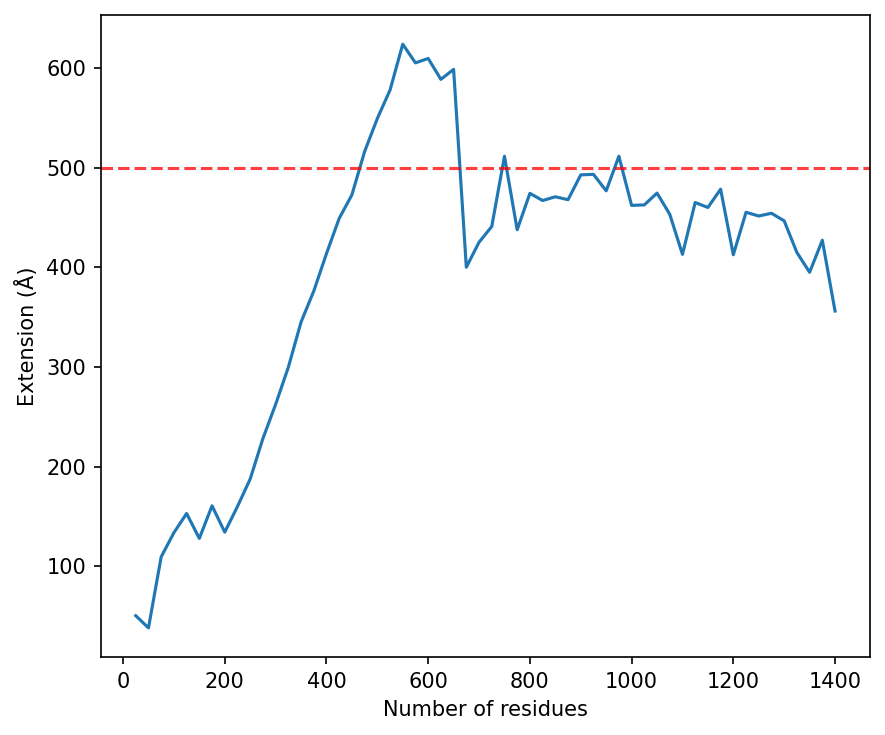

In [8]:
fig, ax = plt.subplots(figsize=(6,5), dpi=150)
ax.plot(mat_data[:,0], mat_data[:,1])
ax.axhline(y=500, color='red', linestyle='--', alpha=0.75)
ax.set_ylabel('Extension (Å)')
ax.set_xlabel('Number of residues')
plt.tight_layout()